<a href="https://colab.research.google.com/github/Cvetelina1/AnomalyDetectionWithIsolationForest/blob/main/AnomalyDetectionWithIsolationForestBG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Isolation Forest Алгоритъм - Откриването на аномалия е идентифицирането на събития в набор от данни, които не съответстват на очаквания модел. В приложението тези събития могат да бъдат от решаващо значение.

Например, те могат да бъдат случаи на проникване в мрежа или на измама.

Ще използваме Isolation forest алгоритъм, за да открием такива аномалии.

Isolation forest алгоритъма зависи от наблюдението, че е лесно да се изолира отклонение, докато е по-трудно да се опише нормална точка от данни.


Описание:

* Стъпка 1: Зареждане на библиотеките, които ще ни позволят да манипулираме данни бързо и лесно
* Стъпка 2 и 3: Генерираме набор за обучение и тестване, състоящ се от нормални наблюдения. Те имат същите разпределения
* Стъпка 4: Генерираме напомнянето за нашия набор от тестове, като създаваме отклонения. Този аномален набор от данни има различно разпределение от данните за обучение и останалите данни за тестване.
* Стъпка 5: Чрез начертаване на данните виждаме, че някои извънредни точки изглеждат неразличими от нормалните точки. Това гарантира, че нашият класификатор ще има значителен процент погрешни класификации поради естеството на данните.
* Стъпка 6: Прилагаме екземпляр на изолационна гора с параметри по подразбиране към данните за обучение.
* Стъпка 7: Добавяме предвидените етикети към X_test в подготовка за анализ
* Стъпка 8: Начертаваме прогнозите на екземпляра на Isolation Forest върху отклоненията.
* Стъпка 9: Прилагаме предвидените етикети към подготовката на X_test за анализ.
* Стъпка 10: Начертаваме прогнозите на екземпляра на Isolation Forest върху нормалните тестови данни.

In [1]:
#Импортиране на необходимите библиотеки и набор от random_seed
import numpy as np

In [2]:
import pandas as pd
random_seed = np.random.RandomState(12)

In [3]:
#Генериране на набор от нормални наблюдения, които да се използват като данни за обучение
x_train = 0.5*random_seed.randn(500,2)
x_train = np.r_[x_train + 3, x_train]
x_train = pd.DataFrame(x_train,columns=["x","y"])

In [4]:
#Генериране на набор от тестове, който също се състои от нормално наблюдение
x_test = 0.5*random_seed.randn(500,2)
x_test = np.r_[x_test + 3, x_test]
x_test = pd.DataFrame(x_test,columns=["x","y"])

In [5]:
#Генериране на набор от извънредни наблюдения. Те се генерират от различно разпределение от нормалните наблюдения
x_outliers = random_seed.uniform(low = -5, high =5, size =(50,2))
x_outliers = pd.DataFrame(x_outliers,columns=["x","y"])

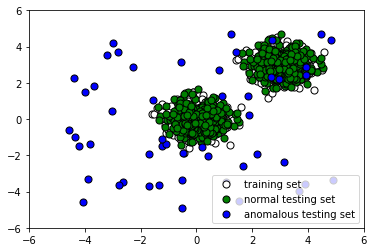

In [7]:
#Нека да разгледаме данните, които сме генерирали
%matplotlib inline
import matplotlib.pyplot as plt

p1 = plt.scatter(x_train.x, x_train.y, c ="white",s=50, edgecolor="black")
p2 = plt.scatter(x_test.x, x_test.y, c ="green",s=50, edgecolor="black")
p3 = plt.scatter(x_outliers.x, x_outliers.y, c ="blue",s=50, edgecolor="black")

plt.xlim((-6,6))
plt.ylim((-6,6))
plt.legend(
    [p1,p2,p3],
    ["training set", "normal testing set", "anomalous testing set"],
    loc = "lower right",
)
plt.show()

In [8]:
#Сега ще обучим модел на Isolation Forest върху нашите данни за обучение
from sklearn.ensemble import IsolationForest
clf = IsolationForest()
clf.fit(x_train)
y_pred_train = clf.predict(x_train)
y_pred_test = clf.predict(x_test)
y_pred_outliers = clf.predict(x_outliers)

In [9]:
#Ще видим как ще работи алгоритъмa. Добавяне на етикетите към x_outliers
x_outliers = x_outliers.assign(pred = y_pred_outliers)
x_outliers.head()

,x,y,pred
0,3.947504,2.891003,-1
1,0.413976,-2.025841,-1
2,-2.644476,-3.480783,-1
3,-0.518212,-3.386443,-1
4,2.977669,2.215355,1


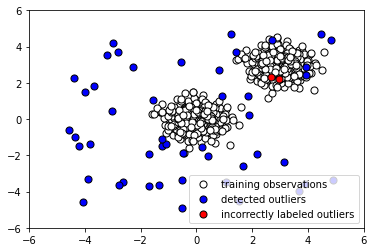

In [12]:
#Нека начертаем прогнозите на Isolation Forest върху отклоненията, за да видим колко е хванала
p1 = plt.scatter(x_train.x, x_train.y, c ="white",s=50, edgecolor="black")
p2 = plt.scatter(
    x_outliers.loc[x_outliers.pred == -1, ["x"]],
    x_outliers.loc[x_outliers.pred == -1, ["y"]],
    c = "blue",
    s=50,
    edgecolor="black"
)
p3 = plt.scatter(
    x_outliers.loc[x_outliers.pred == 1, ["x"]],
    x_outliers.loc[x_outliers.pred == 1, ["y"]],
    c = "red",
    s=50,
    edgecolor="black"
)

plt.xlim((-6,6))
plt.ylim((-6,6))
plt.legend(
    [p1,p2,p3],
    ["training observations", "detected outliers", "incorrectly labeled outliers"],
    loc = "lower right",
)
plt.show()

In [11]:
# Сега нека видим как се представя при нормалните тестови данни. Добавяне на прогнозирания етикет към x_test
x_test = x_test.assign(pred=y_pred_test)
x_test.head()

,x,y,pred
0,3.944575,3.866919,-1
1,2.984853,3.142150,1
2,3.501735,2.168262,-1
3,2.906300,3.233826,1
4,3.273225,3.261790,1


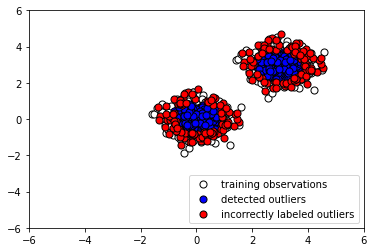

In [13]:
#Сега нека начертаем резултатите, за да видим дали нашият класификатор е обозначил правилно данните от нормалните тестове
p1 = plt.scatter(x_train.x, x_train.y, c ="white",s=50, edgecolor="black")
p2 = plt.scatter(
    x_test.loc[x_test.pred == 1, ["x"]],
    x_test.loc[x_test.pred == 1, ["y"]],
    c = "blue",
    s=50,
    edgecolor="black",
)
p3 = plt.scatter(
    x_test.loc[x_test.pred == -1, ["x"]],
    x_test.loc[x_test.pred == -1, ["y"]],
    c = "red",
    s=50,
    edgecolor="black",
)

plt.xlim((-6,6))
plt.ylim((-6,6))
plt.legend(
    [p1,p2,p3],
    [
     "training observations",
     "detected outliers",
     "incorrectly labeled outliers"
    ],
    loc = "lower right",
)
plt.show()

Този модел се представи доста добре при улавянето на аномалната точка. Имаше доста фалшиво отрицателни (случаи, при които нормалните точки бяха класифицирани като отклонения), но чрез настройка на параметрите на нашия модел може да успеем да ги намалим.